### Trapezoidal Rule

The Trapezoidal Rule is a method for approximating the definite integral of a function. It is based on approximating the region under the curve as a series of trapezoids, and summing up the areas of these trapezoids.

#### Formula
For a given interval $[a, b]$ and a function $f(x)$, the trapezoidal rule formula is:

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{2} \left( f(a) + f(b) \right)
$$

For more subdivisions, you can split the interval $[a, b]$ into $n$ smaller intervals. In this case, the formula becomes:

$$
\int_a^b f(x) \, dx \approx \frac{h}{2} \left( f(x_0) + 2 \sum_{i=1}^{n-1} f(x_i) + f(x_n) \right)
$$

where:
- $h = \frac{b - a}{n} $ is the width of each subdivision,
- $ x_0 = a , x_n = b $,
- $ x_1, x_2, ..., x_{n-1} $ are the intermediate points.

#### Example
Let's approximate the integral of $f(x) = \sin(x)$ over the interval $[0, \pi]$ using the Trapezoidal Rule.

**Step 1**: Define the function.
$
f(x) = \sin(x)
$

**Step 2**: Apply the trapezoidal rule.

Let's use $n = 4 $ subdivisions.

In [5]:
import numpy as np

# Define the function
def f(x):
    return np.sin(x)

# Trapezoidal rule implementation
def trapezoidal_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)  # Create n+1 points in the interval [a, b]
    h = (b - a) / n  # Width of each subinterval
    return (h / 2) * (f(x[0]) + 2 * np.sum(f(x[1:n])) + f(x[n]))

# Define the interval and number of subdivisions
a = 0
b = np.pi
n = 10

# Approximate the integral
integral = trapezoidal_rule(f, a, b, n)
integral

1.9835235375094544

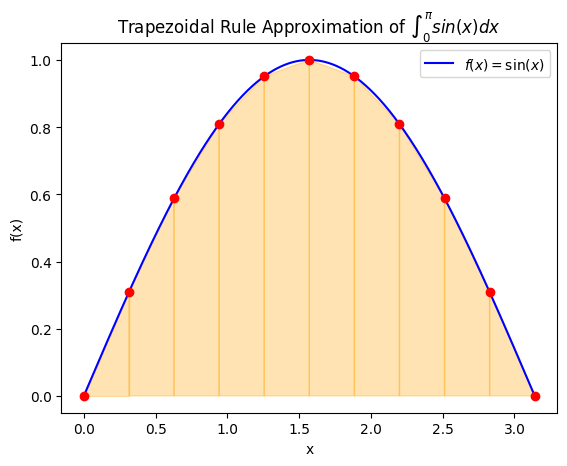

In [6]:
import matplotlib.pyplot as plt

# Create x values
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

# Points for the trapezoids
x_trap = np.linspace(a, b, n+1)
y_trap = f(x_trap)

# Plot the function
plt.plot(x_vals, y_vals, label=r'$f(x) = \sin(x)$', color='blue')

# Plot trapezoids
for i in range(n):
    plt.fill([x_trap[i], x_trap[i+1], x_trap[i+1], x_trap[i]], 
             [0, 0, y_trap[i+1], y_trap[i]], color='orange', alpha=0.3)

# Highlight the points
plt.scatter(x_trap, y_trap, color='red', zorder=5)
plt.title('Trapezoidal Rule Approximation of $\\int_0^\\pi sin(x) dx$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


### Simpson's Rule

Simpson's Rule provides a more accurate approximation than the Trapezoidal Rule by fitting a quadratic polynomial through the points instead of a linear one.

#### Formula
For a given interval $[a, b]$ and a function $f(x)$, Simpson's Rule is based on approximating the integral using parabolic segments. The formula for Simpson's Rule when using **two subdivisions** is:

$$
\int_a^b f(x) \, dx \approx \frac{b - a}{6} \left( f(a) + 4f\left(\frac{a + b}{2}\right) + f(b) \right)
$$

For $n$ subdivisions (where $n$ is even), the formula becomes:

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left( f(x_0) + 4 \sum_{i=1,3,5,\dots}^{n-1} f(x_i) + 2 \sum_{i=2,4,6,\dots}^{n-2} f(x_i) + f(x_n) \right)
$$

where:
- $h = \frac{b - a}{n}$ is the width of each subdivision,
- $x_0 = a, x_n = b$,
- $x_1, x_2, ..., x_{n-1}$ are the intermediate points.

#### Example
Let's approximate the integral of \(f(x) = \sin(x)\) over the interval $[0, \pi]$ using Simpson's Rule.

**Step 1**: Define the function.
$$
f(x) = \sin(x)
$$

**Step 2**: Apply Simpson's Rule.

Let's use $n = 4$ subdivisions (since $n$ must be even).

In [8]:
import numpy as np

# Define the function
def f(x):
    return np.sin(x)

# Simpson's rule implementation
def simpsons_rule(f, a, b, n):
    x = np.linspace(a, b, n+1)  # Create n+1 points in the interval [a, b]
    h = (b - a) / n  # Width of each subinterval
    return (h / 3) * (f(x[0]) + 4 * np.sum(f(x[1:n:2])) + 2 * np.sum(f(x[2:n-1:2])) + f(x[n]))

# Define the interval and number of subdivisions
a = 0
b = np.pi
n = 4

# Approximate the integral
integral = simpsons_rule(f, a, b, n)
integral

2.0045597549844207

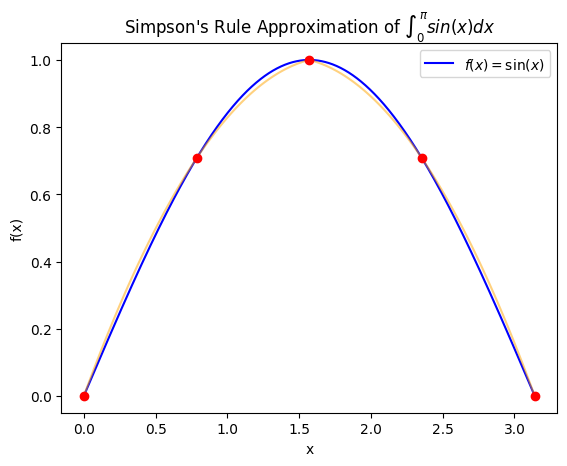

In [9]:
import matplotlib.pyplot as plt

# Create x values
x_vals = np.linspace(a, b, 1000)
y_vals = f(x_vals)

# Points for the Simpson's Rule
x_simpson = np.linspace(a, b, n+1)
y_simpson = f(x_simpson)

# Plot the function
plt.plot(x_vals, y_vals, label=r'$f(x) = \sin(x)$', color='blue')

# Plot parabolic segments (Simpson's Rule approximation)
for i in range(0, n, 2):
    # Create the x values for the parabolic segments
    x_segment = [x_simpson[i], x_simpson[i+1], x_simpson[i+2]]
    y_segment = [f(x_segment[0]), f(x_segment[1]), f(x_segment[2])]
    
    # Fit a quadratic curve to the points
    p = np.polyfit(x_segment, y_segment, 2)
    p_x = np.linspace(x_segment[0], x_segment[2], 100)
    p_y = np.polyval(p, p_x)
    
    # Plot the parabolic segment
    plt.plot(p_x, p_y, color='orange', alpha=0.5)

# Highlight the points
plt.scatter(x_simpson, y_simpson, color='red', zorder=5)
plt.title('Simpson\'s Rule Approximation of $\\int_0^\\pi sin(x) dx$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()


### Proof of Simpson's Rule

Simpson's Rule is derived using polynomial interpolation. Specifically, it approximates the integral of a function by fitting a quadratic polynomial to three points. The proof involves the following steps:

#### Step 1: Quadratic Interpolation

Consider a function $ f(x) $ over an interval $[a, b]$. The idea is to approximate $f(x)$ by a quadratic polynomial that passes through three points: $ f(a) $, $ f\left(\frac{a+b}{2}\right) $, and $ f(b) $. Let the quadratic polynomial be of the form:

$$
p(x) = A x^2 + B x + C
$$

We can determine the coefficients $ A $, $ B $, and $ C $ by solving the following system of equations, which ensure that the polynomial passes through the points $ (a, f(a)) $, $ \left(\frac{a + b}{2}, f\left(\frac{a + b}{2}\right)\right) $, and $ (b, f(b)) $:

1. $ p(a) = f(a) $
2. $ p\left(\frac{a + b}{2}\right) = f\left(\frac{a + b}{2}\right) $
3. $ p(b) = f(b) $

These three conditions allow us to uniquely determine the coefficients $ A $, $ B $, and $ C $.

#### Step 2: Integral of the Quadratic Polynomial

Once we have the quadratic polynomial $ p(x) $, we integrate it over the interval $[a, b]$ to approximate the integral of $ f(x)$. The integral of a quadratic polynomial is straightforward:

$$
\int_a^b p(x) \, dx = \int_a^b \left(A x^2 + B x + C\right) \, dx
$$

The result of this integration is:

$$
\int_a^b p(x) \, dx = \frac{A}{3} (b^3 - a^3) + \frac{B}{2} (b^2 - a^2) + C(b - a)
$$

#### Step 3: Relating the Coefficients

Using the system of equations, we can express the coefficients $ A $, $ B $, and $ C $ in terms of the function values at the points $ a $, $ \frac{a + b}{2} $, and $ b $. After substituting the expressions for $ A $, $ B $, and $ C $, the integral simplifies to the formula for Simpson's Rule:
$$
\int_a^b f(x) \, dx \approx \frac{b - a}{6} \left( f(a) + 4 f\left(\frac{a + b}{2}\right) + f(b) \right)
$$

This formula gives the approximation of the integral using a quadratic polynomial fitted through the points $ f(a)$, $ f\left(\frac{a + b}{2}\right) $, and $ f(b) $.

#### Step 4: Generalization for \(n\) Subdivisions

For a more general case with \(n\) subdivisions (where \(n\) is even), we apply Simpson's Rule to each pair of adjacent intervals. The approximation for the integral is then:

$$
\int_a^b f(x) \, dx \approx \frac{h}{3} \left( f(x_0) + 4 \sum_{i=1,3,5,\dots}^{n-1} f(x_i) + 2 \sum_{i=2,4,6,\dots}^{n-2} f(x_i) + f(x_n) \right)
$$

where:
- $h = \frac{b - a}{n}$ is the width of each subinterval,
- $x_0 = a $, $ x_n = b $,
- $x_1, x_2, ..., x_{n-1} $ are the intermediate points.

This formula gives a more accurate approximation by applying Simpson's Rule to multiple subintervals and summing the results.

---

This completes the proof of Simpson's Rule. It relies on quadratic interpolation and integral calculus to arrive at the formula for approximating definite integrals.
